In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("C:/Users/bibhu/downloaded dataset/Algerian_forest_fires_dataset.csv",header =1)
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


# Data Cleaning

In [7]:
data[data.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [9]:
data = data.drop(122)

In [11]:
data= data.reset_index()

In [13]:
data.iloc[[122]]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [15]:
data = data.drop(122)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 244
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        244 non-null    int64 
 1   day          244 non-null    object
 2   month        244 non-null    object
 3   year         244 non-null    object
 4   Temperature  244 non-null    object
 5    RH          244 non-null    object
 6    Ws          244 non-null    object
 7   Rain         244 non-null    object
 8   FFMC         244 non-null    object
 9   DMC          244 non-null    object
 10  DC           244 non-null    object
 11  ISI          244 non-null    object
 12  BUI          244 non-null    object
 13  FWI          244 non-null    object
 14  Classes      243 non-null    object
dtypes: int64(1), object(14)
memory usage: 30.5+ KB


In [19]:
data.isnull().sum()

index          0
day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [21]:
data = data.dropna()

In [23]:
data.isnull().sum()

index          0
day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [27]:
data.loc[:122,"region"]= 0
data.loc[122:,"region"]= 1

In [29]:
data.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [43]:
data.columns = data.columns.str.strip(" ")

In [53]:
data.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region', 'RH',
       'Ws'],
      dtype='object')

In [49]:
data[["day","month","year","Temperature","RH","Ws"]] = data[["day","month","year","Temperature","RH","Ws"]].astype(int)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 244
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        243 non-null    int64  
 1   day          243 non-null    int32  
 2   month        243 non-null    int32  
 3   year         243 non-null    int32  
 4   Temperature  243 non-null    int32  
 5   RH           243 non-null    int32  
 6   Ws           243 non-null    int32  
 7   Rain         243 non-null    float64
 8   FFMC         243 non-null    float64
 9   DMC          243 non-null    float64
 10  DC           243 non-null    float64
 11  ISI          243 non-null    float64
 12  BUI          243 non-null    float64
 13  FWI          243 non-null    float64
 14  Classes      243 non-null    object 
 15  region       243 non-null    float64
dtypes: float64(8), int32(6), int64(1), object(1)
memory usage: 34.7+ KB


In [65]:
data = data.loc[:, ~data.columns.duplicated()]

In [37]:
for i in data.columns:
    if data[i].dtype =="O" and i != "Classes":
        data[i] = data[i].astype(float)
        

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 244
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        243 non-null    int64  
 1   day          243 non-null    int32  
 2   month        243 non-null    int32  
 3   year         243 non-null    int32  
 4   Temperature  243 non-null    int32  
 5   RH           243 non-null    int32  
 6   Ws           243 non-null    int32  
 7   Rain         243 non-null    float64
 8   FFMC         243 non-null    float64
 9   DMC          243 non-null    float64
 10  DC           243 non-null    float64
 11  ISI          243 non-null    float64
 12  BUI          243 non-null    float64
 13  FWI          243 non-null    float64
 14  Classes      243 non-null    object 
 15  region       243 non-null    float64
dtypes: float64(8), int32(6), int64(1), object(1)
memory usage: 34.7+ KB


In [71]:
data.describe()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
count,243.000000,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,122.316872,15.761317,7.502058,2012.0,32.152263,62.041152,62.041152,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,71.540562,8.842552,1.114793,0.0,3.628039,14.828160,14.828160,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,0.000000,1.000000,6.000000,2012.0,22.000000,21.000000,21.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,60.500000,8.000000,7.000000,2012.0,30.000000,52.500000,52.500000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,121.000000,16.000000,8.000000,2012.0,32.000000,63.000000,63.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,184.500000,23.000000,8.000000,2012.0,35.000000,73.500000,73.500000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,245.000000,31.000000,9.000000,2012.0,42.000000,90.000000,90.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [73]:
data.to_csv("Algerian forest fire cleaned dataset.csv",index=False)

# EDA

In [75]:
df = pd.read_csv("Algerian forest fire cleaned dataset.csv")
df.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,0,1,6,2012,29,57,57,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,1,2,6,2012,29,61,61,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,2,3,6,2012,26,82,82,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,3,4,6,2012,25,89,89,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,4,5,6,2012,27,77,77,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [77]:
dfc = data.drop(["day","month","year"],axis= 1)

In [79]:
dfc.head()

,index,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,0,29,57,57,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,1,29,61,61,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,2,26,82,82,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,3,25,89,89,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,4,27,77,77,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [81]:
dfc.columns

Index(['index', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI',
       'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [83]:
dfc.head()

,index,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,0,29,57,57,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,1,29,61,61,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,2,26,82,82,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,3,25,89,89,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,4,27,77,77,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [85]:
dfc["Classes"].unique

<bound method Series.unique of 0       not fire   
1       not fire   
2       not fire   
3       not fire   
4       not fire   
           ...     
240         fire   
241     not fire   
242     not fire   
243     not fire   
244    not fire    
Name: Classes, Length: 243, dtype: object>

In [87]:
dfc["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [89]:
dfc["Classes"] = np.where(dfc["Classes"].str.contains('not fire'),0,1)

In [91]:
dfc.head()

,index,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,0,29,57,57,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,1,29,61,61,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,2,26,82,82,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,3,25,89,89,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,4,27,77,77,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [93]:
dfc["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [107]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 244
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        243 non-null    int64  
 1   Temperature  243 non-null    int32  
 2   RH           243 non-null    int32  
 3   Ws           243 non-null    int32  
 4   Rain         243 non-null    float64
 5   FFMC         243 non-null    float64
 6   DMC          243 non-null    float64
 7   DC           243 non-null    float64
 8   ISI          243 non-null    float64
 9   BUI          243 non-null    float64
 10  FWI          243 non-null    float64
 11  Classes      243 non-null    int32  
 12  region       243 non-null    float64
dtypes: float64(8), int32(4), int64(1)
memory usage: 30.9 KB


In [119]:
dfc.columns

Index(['index', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI',
       'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [ ]:
#desity plot for all features
for i in dfc.columns:    
    dfc.hist(column=i,bins=50,figsize = (20,15))
    plt.show()

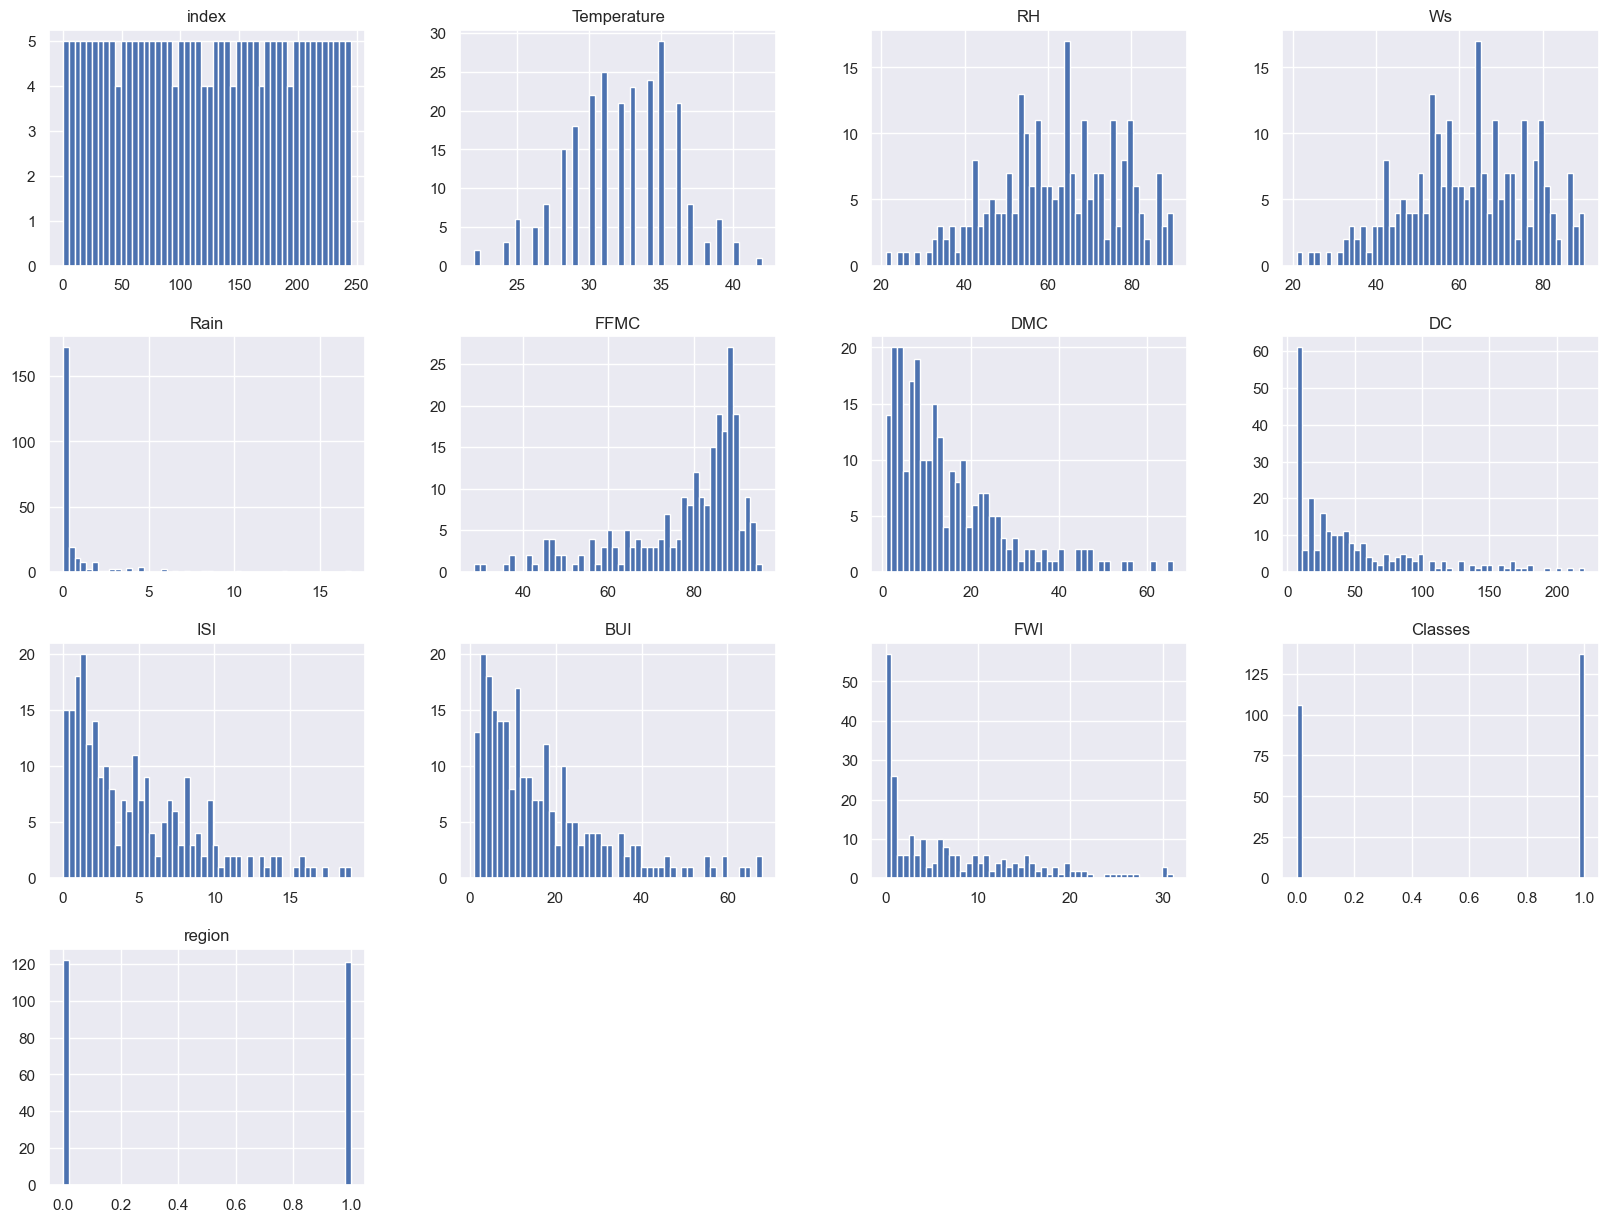

In [139]:
import seaborn as sns
sns.set_style("darkgrid")

dfc.hist(bins=50,figsize=(20,15))
plt.show()

In [147]:
percentage = dfc["Classes"].value_counts(normalize = True)*100

In [149]:
percentage

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

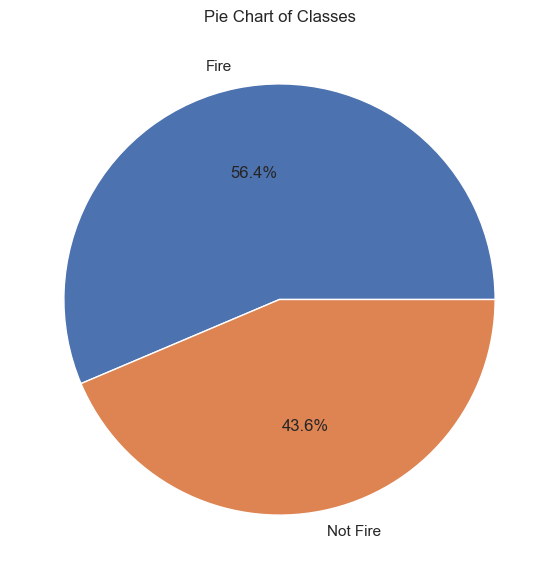

In [151]:
# plotting piechart
classlabels=["Fire","Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie Chart of Classes")
plt.show()

In [153]:
## Correlation
dfc.corr()

,index,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
index,1.000000,0.217385,-0.378265,-0.378265,-0.031468,0.227708,0.258884,0.056385,0.281342,0.181099,0.253037,0.176627,0.869435
Temperature,0.217385,1.000000,-0.651400,-0.651400,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.378265,-0.651400,1.000000,1.000000,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.378265,-0.651400,1.000000,1.000000,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Rain,-0.031468,-0.326492,0.222356,0.222356,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.227708,0.676568,-0.644873,-0.644873,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.258884,0.485687,-0.408519,-0.408519,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.056385,0.376284,-0.226941,-0.226941,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.281342,0.603871,-0.686667,-0.686667,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.181099,0.459789,-0.353841,-0.353841,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408


<Axes: >

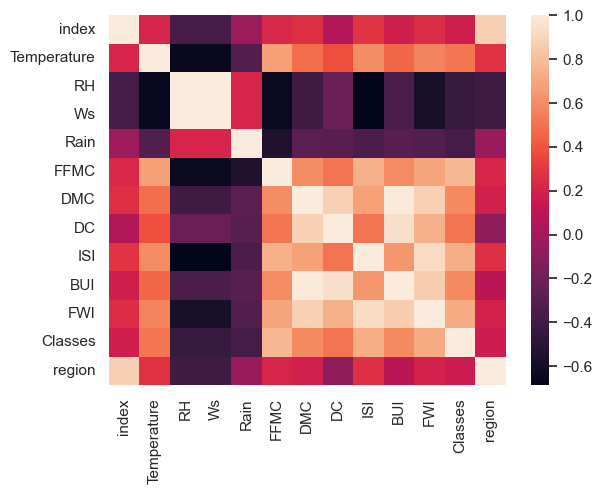

In [157]:
sns.heatmap(dfc.corr())

<Axes: >

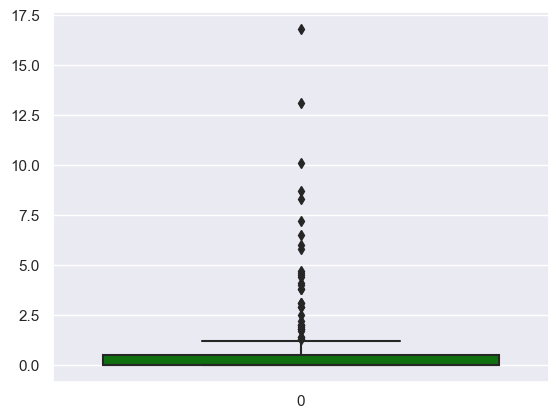

In [166]:
## Box Plots
sns.boxplot(dfc["Rain"],color='green')

In [168]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

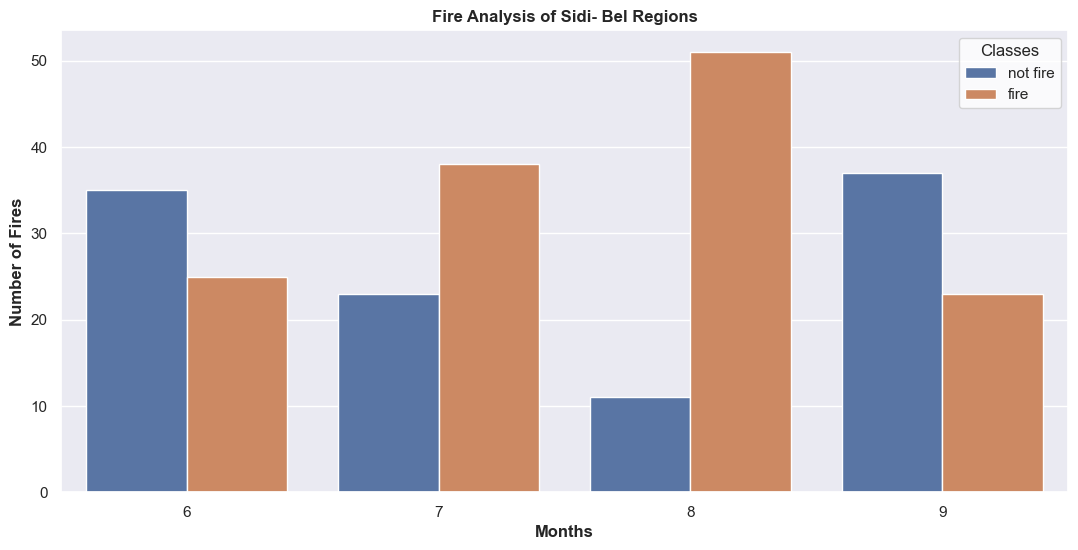

In [172]:
## Monthly Fire Analysis
dftemp=df.loc[df['region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Brjaia Regions')

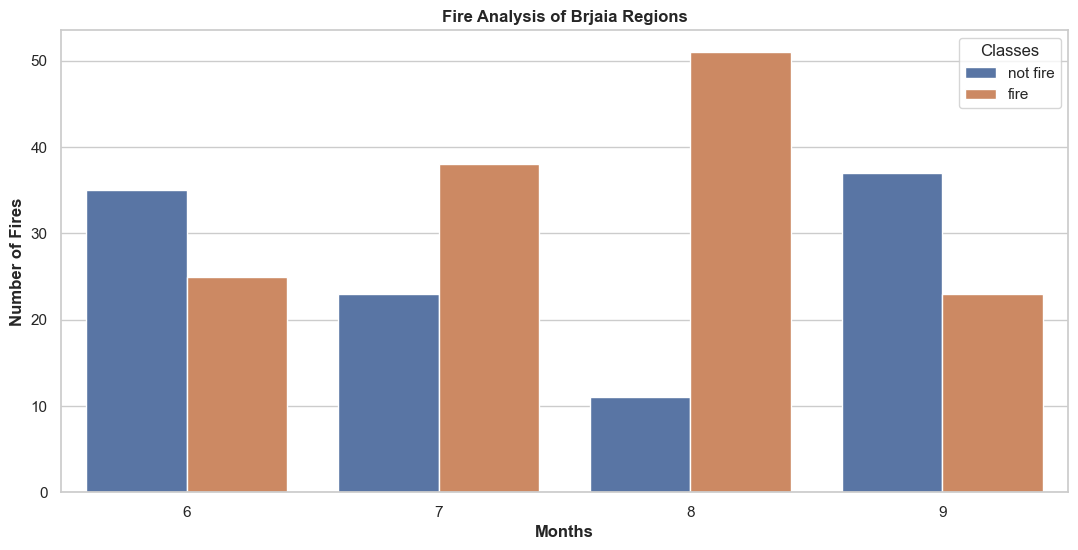

In [176]:
## Monthly Fire Analysis
dftemp=df.loc[df['region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Brjaia Regions",weight='bold')

### It is observed that most number fire occured in month of august and july. Less number of fire was in september month 